<a id="Neural Network Project"></a>
## Neural Network Project



In [14]:
# Your work for analyzing and processing the data
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import pandas as pd

We decided to change all text inputs into numbers for our cost calculations. All of our text data happened to be categories so we assigned each category to a number so that it would be easier for the model to compute. 

In [15]:
df = pd.read_csv("heart.csv")

df['Sex'] = df['Sex'].replace('M', 1).replace('F', 2)
df['ChestPainType'] = df['ChestPainType'].replace('ATA', 1).replace('NAP', 2).replace('ASY', 3).replace('TA', 4)
df['RestingECG'] = df['RestingECG'].replace('Normal', 1).replace('ST', 2).replace('LVH', 3)
df['ExerciseAngina'] = df['ExerciseAngina'].replace('N', 1).replace('Y', 2)
df['ST_Slope'] = df['ST_Slope'].replace('Up', 1).replace('Flat', 2).replace('Down', 3)
dataSet = df.to_numpy()

We split the train and test data to a 90/10 split. This choice allowed us more data to use for training. Then we normalized the data including the categories which we replaced with integers such that the values in each row add up to 1. 

In [16]:
X = dataSet[:, :-1]
Y = dataSet[:, -1:]
X_normed = normalize(X, axis=1, norm='l1')

X_train, X_test, y_train, y_test = train_test_split(X_normed, Y, test_size=0.1)

### Model

Some of the neural network improvements considered:
- Weight initialization methods (e.g., zeroes, random, etc.)
- Regularization: L2, dropout, etc.
- Mini-batch gradient descent
- Gradient descent optimization algorithm: momentum, RMSProp, Adam, etc.
- Batch normalization

Show the results with your model with improvements. Use markdown boxes to discuss the effect of your improvement(s) and change in accuracy.

Momentum and L2 Regularization: 
Cost after iteration 0: 0.691803
Cost after iteration 100: 0.638111
Cost after iteration 200: 0.633594
Cost after iteration 300: 0.632692
Cost after iteration 400: 0.632079
Cost after iteration 500: 0.631571
Cost after iteration 600: 0.631059
Cost after iteration 700: 0.630479
Cost after iteration 800: 0.629806
Cost after iteration 900: 0.628992
Cost after iteration 1000: 0.628026
Cost after iteration 1100: 0.626820
Cost after iteration 1200: 0.625433
Cost after iteration 1300: 0.624055
Cost after iteration 1400: 0.622692
Cost after iteration 1500: 0.621267
Cost after iteration 1600: 0.619758
Cost after iteration 1700: 0.618200
Cost after iteration 1800: 0.616489
Cost after iteration 1900: 0.614542
Cost after iteration 2000: 0.612458
Cost after iteration 2100: 0.610586
Cost after iteration 2200: 0.608940
Cost after iteration 2300: 0.607285
Cost after iteration 2400: 0.605835
Cost after iteration 2500: 0.604080
Cost after iteration 2600: 0.602393
Cost af

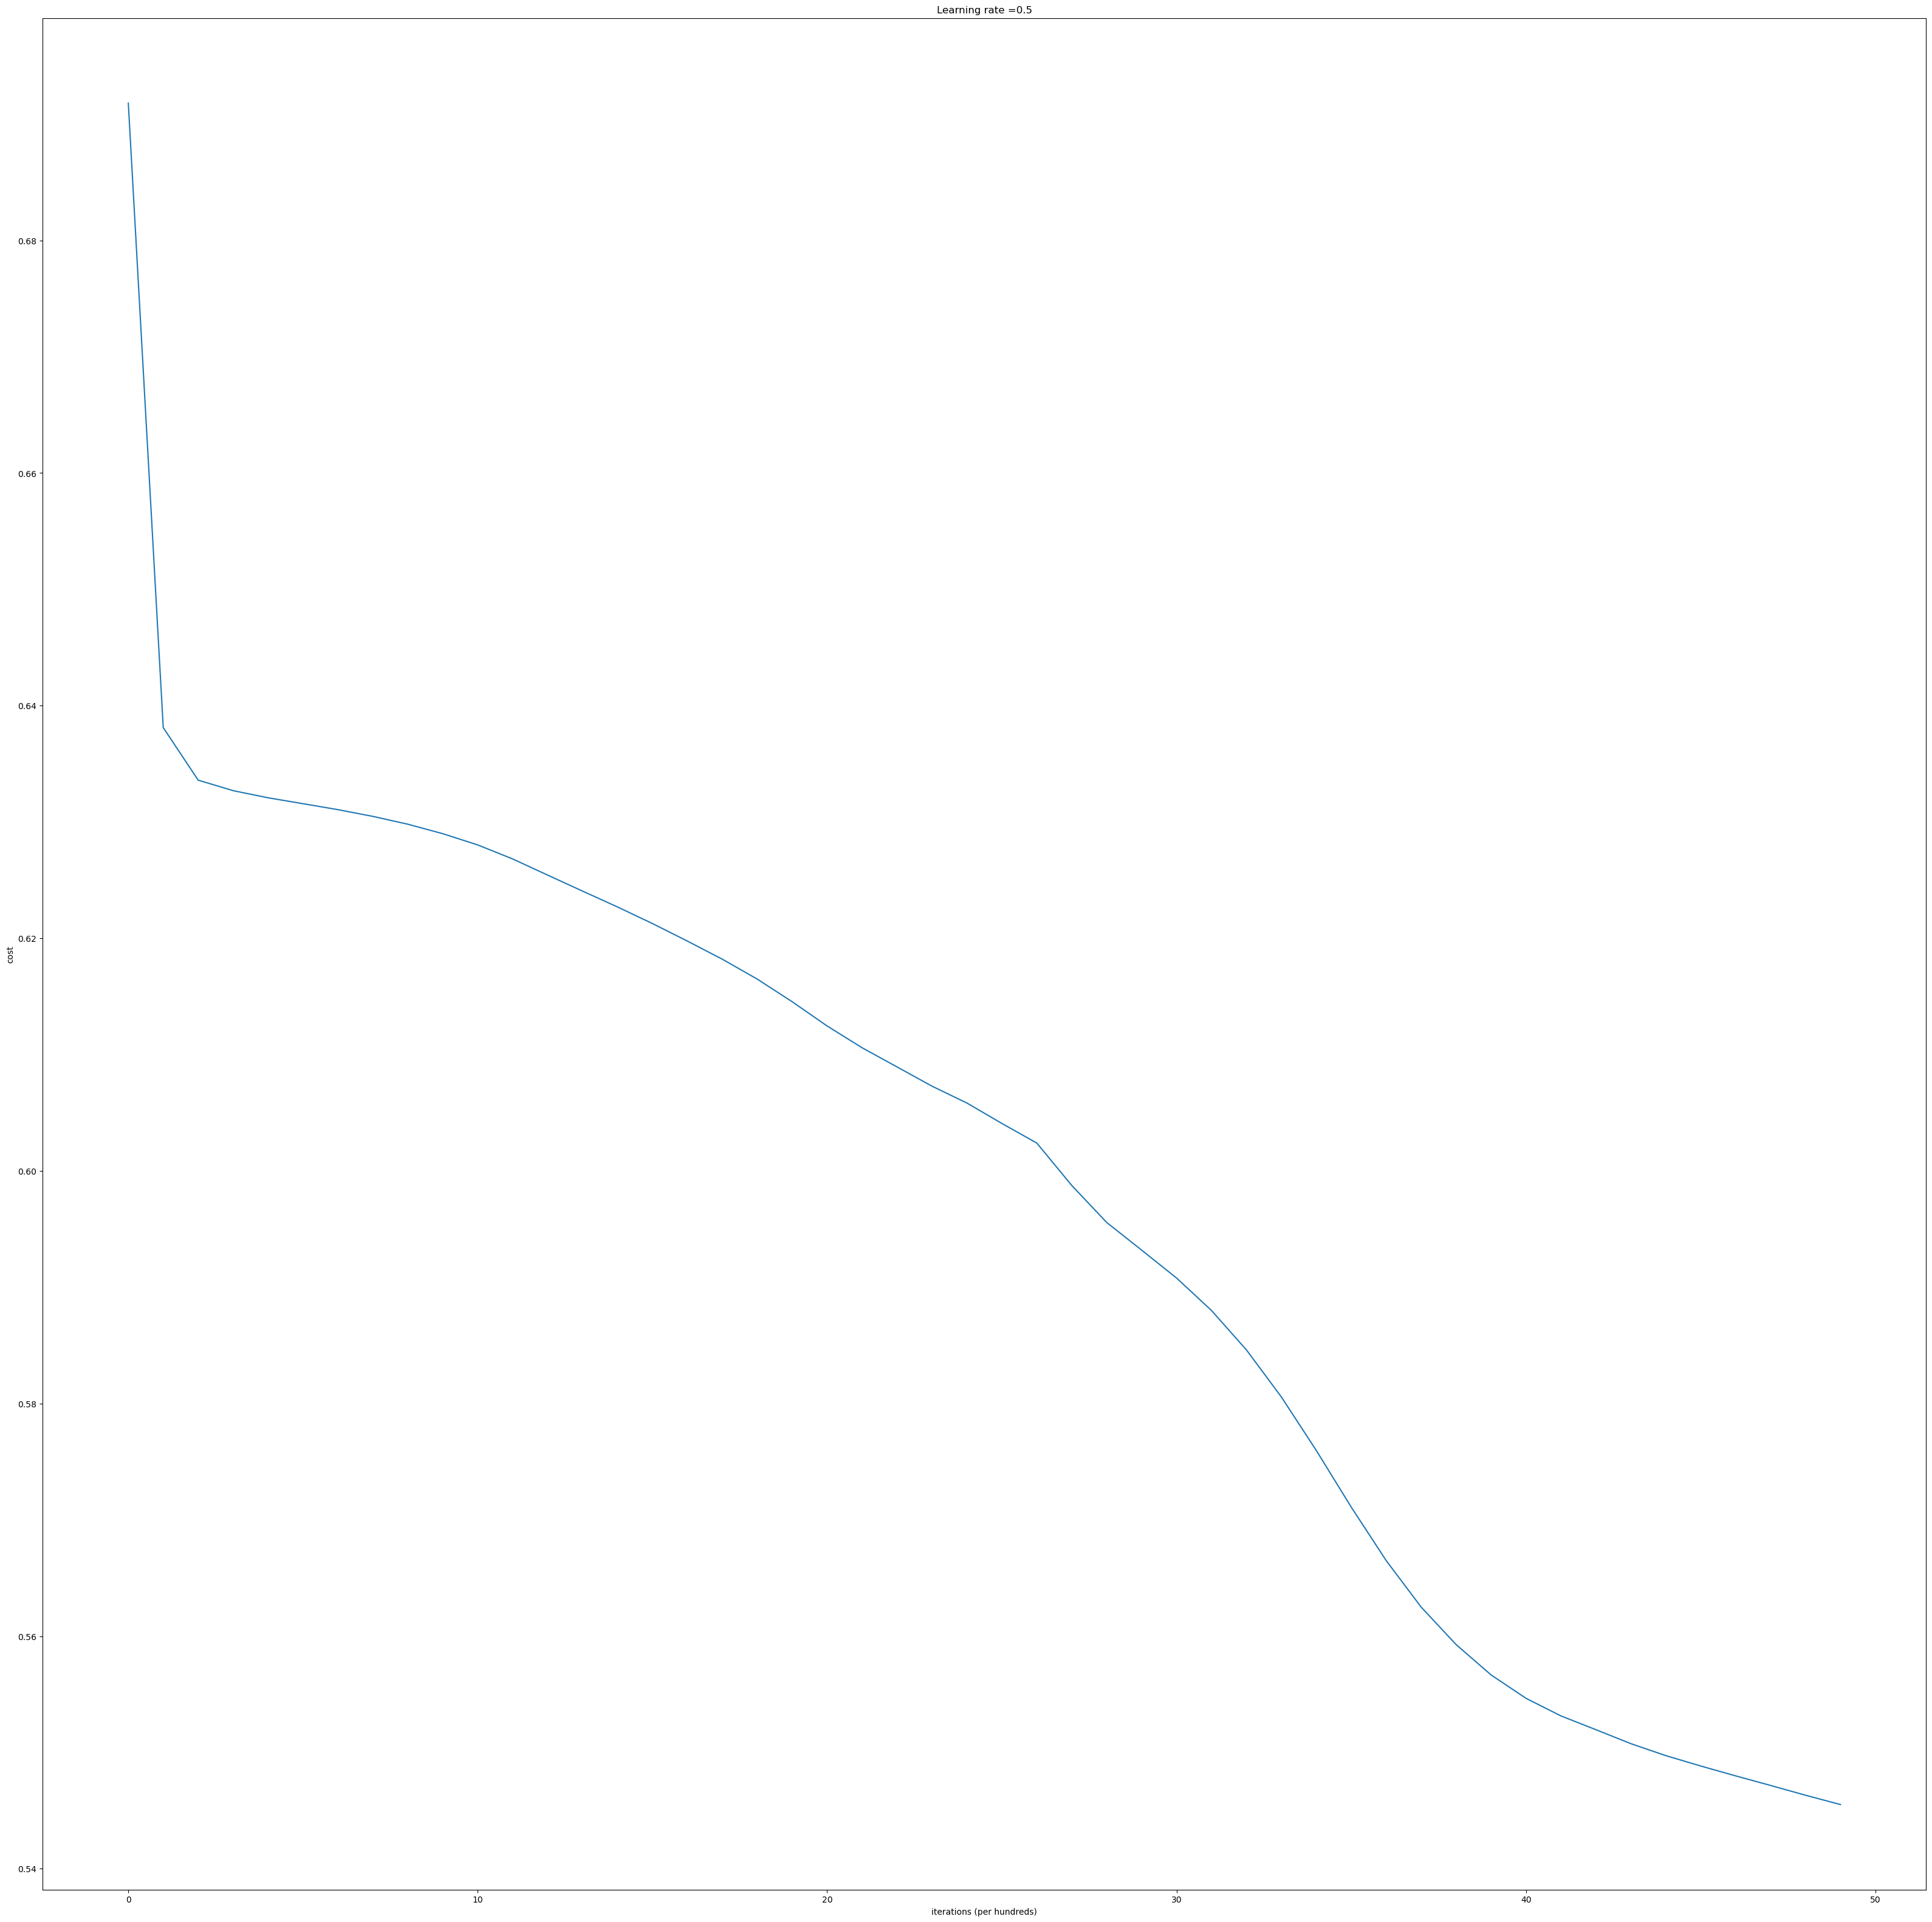

Train
Accuracy: 0.7397094430992738
Test
Accuracy: 0.7608695652173914
Just Momentum: 
Cost after iteration 0: 0.691517
Cost after iteration 100: 0.676181
Cost after iteration 200: 0.664190
Cost after iteration 300: 0.653715
Cost after iteration 400: 0.645899
Cost after iteration 500: 0.640731
Cost after iteration 600: 0.637651
Cost after iteration 700: 0.635707
Cost after iteration 800: 0.634665
Cost after iteration 900: 0.634147
Cost after iteration 1000: 0.633791
Cost after iteration 1100: 0.633410
Cost after iteration 1200: 0.633124
Cost after iteration 1300: 0.632878
Cost after iteration 1400: 0.632667
Cost after iteration 1500: 0.632510
Cost after iteration 1600: 0.632298
Cost after iteration 1700: 0.632096
Cost after iteration 1800: 0.631891
Cost after iteration 1900: 0.631744
Cost after iteration 2000: 0.631628
Cost after iteration 2100: 0.631515
Cost after iteration 2200: 0.631402
Cost after iteration 2300: 0.631286
Cost after iteration 2400: 0.631163
Cost after iteration 2500: 

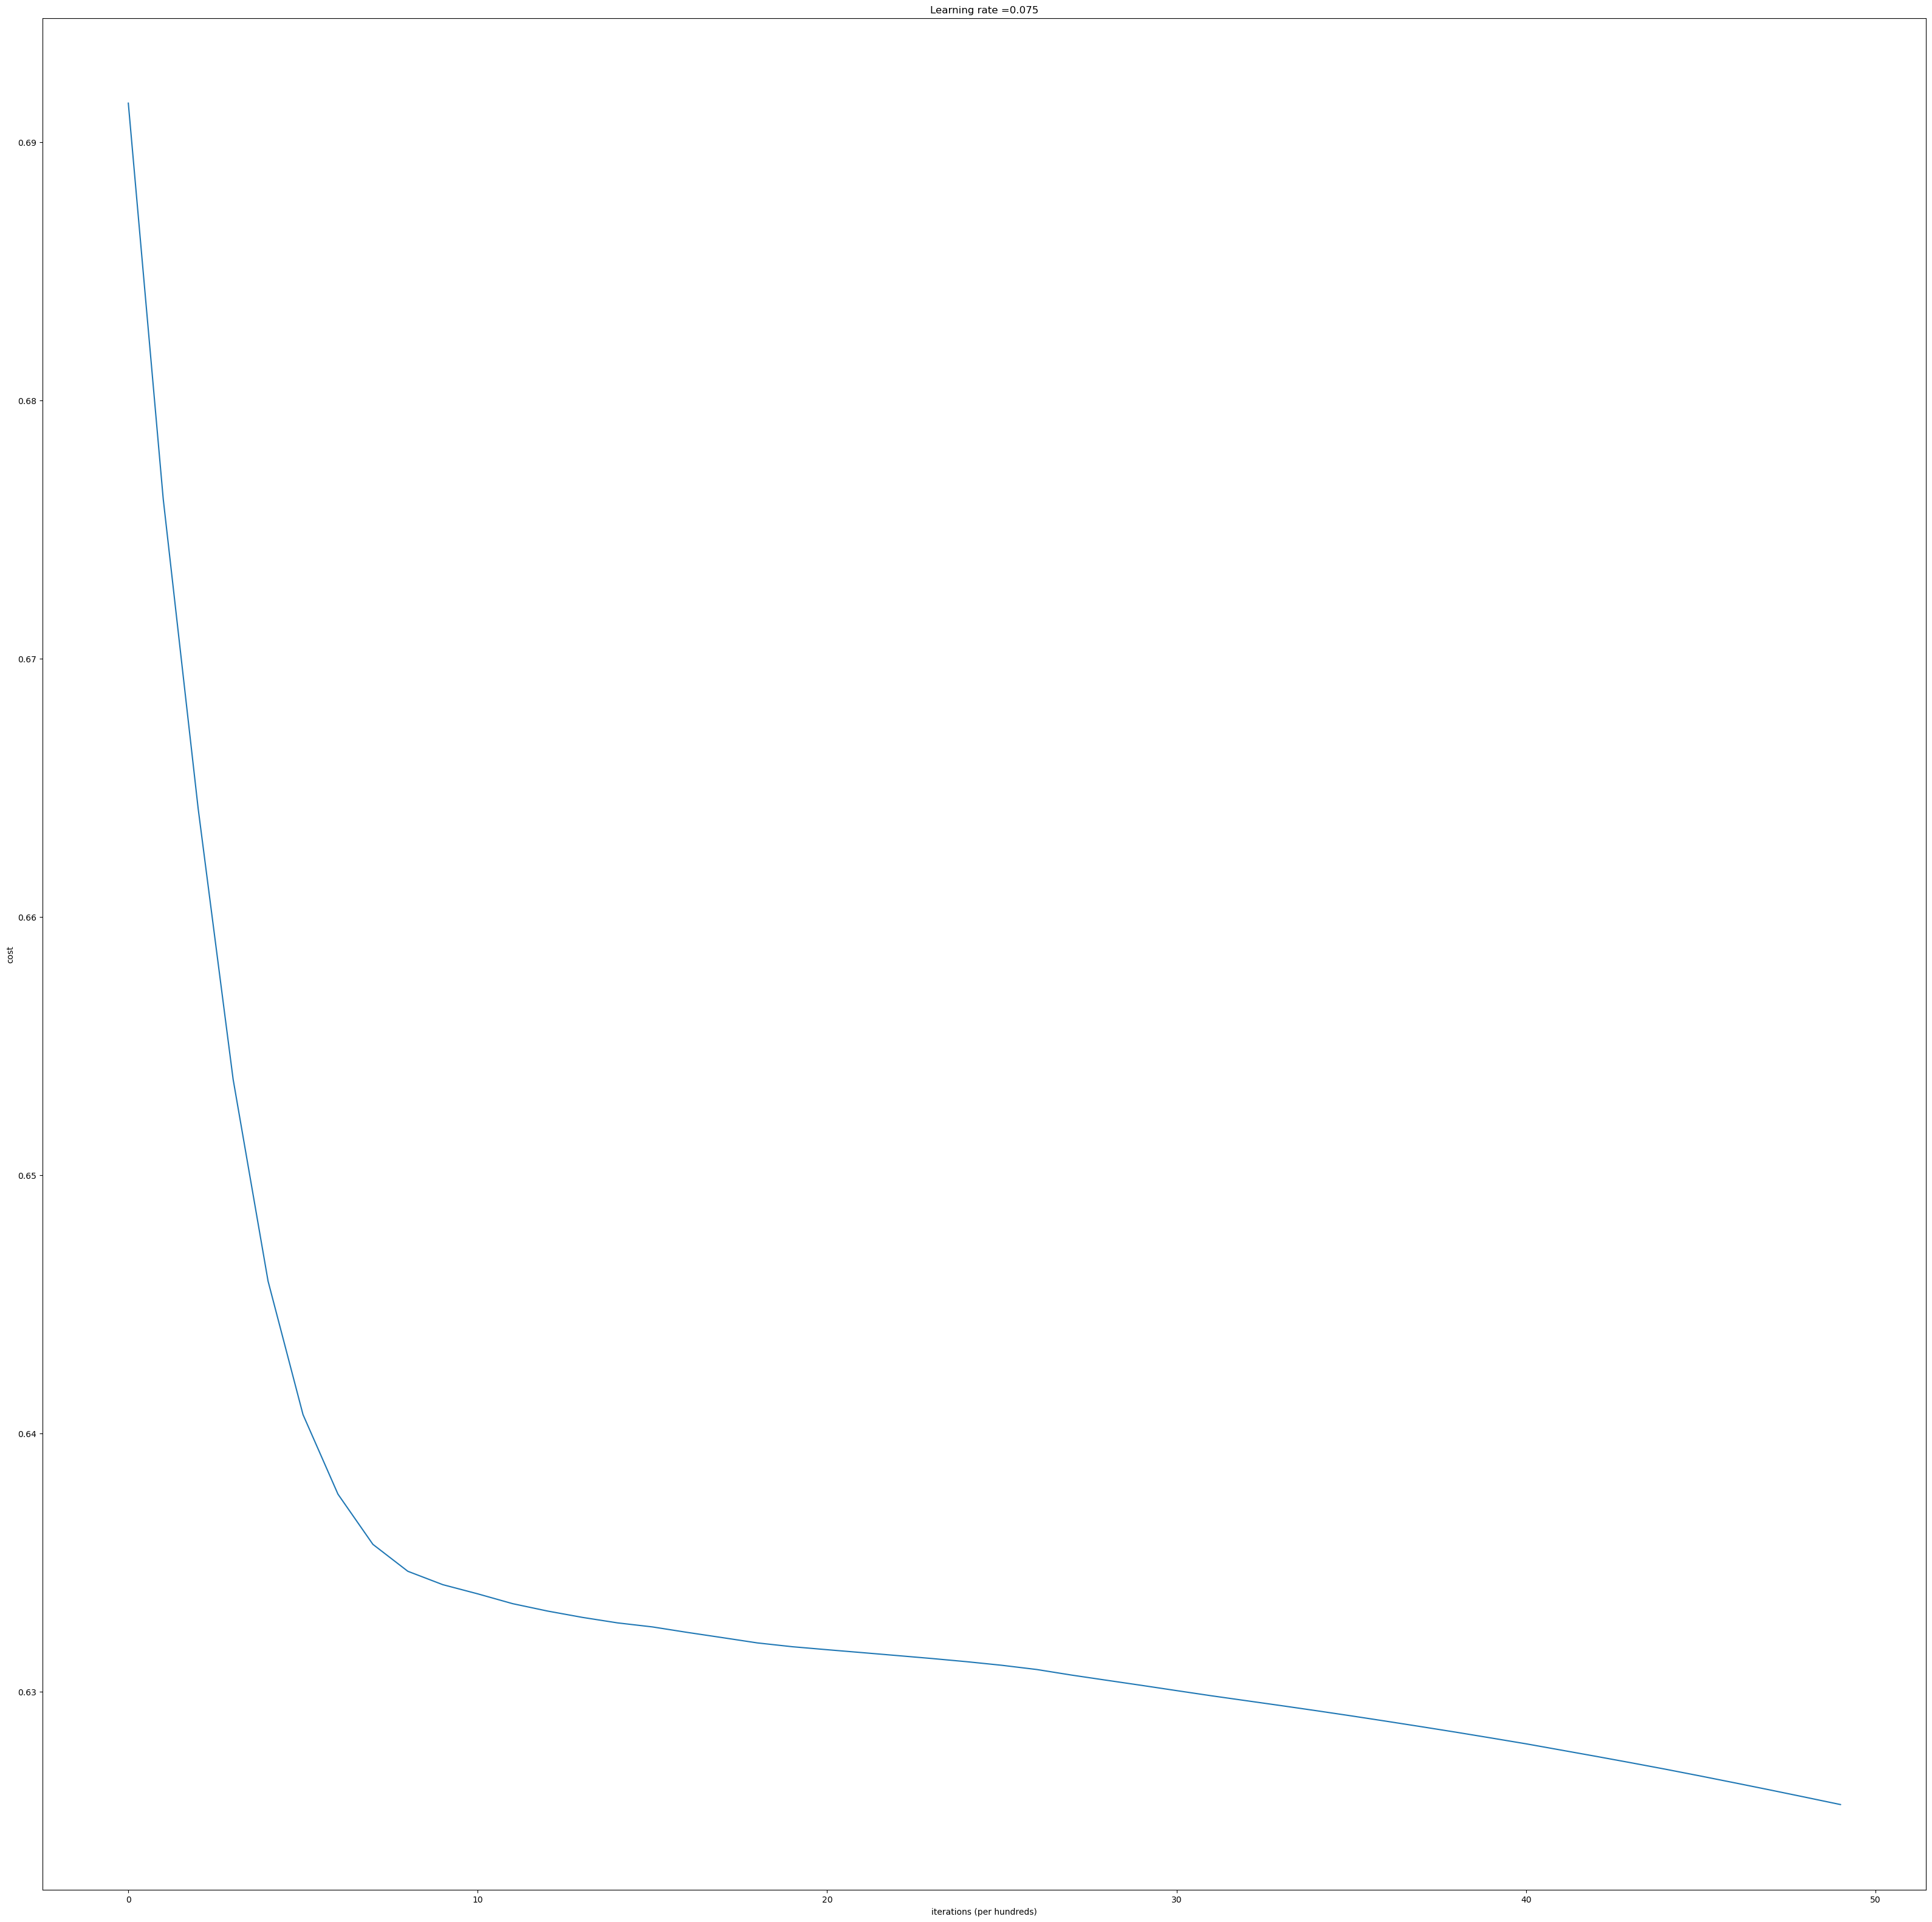

Train
Accuracy: 0.6452784503631963
Test
Accuracy: 0.7282608695652175
Just L2 Regularization: 
Cost after iteration 0: 0.691803
Cost after iteration 100: 0.671617
Cost after iteration 200: 0.658652
Cost after iteration 300: 0.646697
Cost after iteration 400: 0.638898
Cost after iteration 500: 0.634839
Cost after iteration 600: 0.632918
Cost after iteration 700: 0.631892
Cost after iteration 800: 0.630898
Cost after iteration 900: 0.629952
Cost after iteration 1000: 0.629004
Cost after iteration 1100: 0.627977
Cost after iteration 1200: 0.626824
Cost after iteration 1300: 0.625505
Cost after iteration 1400: 0.623978
Cost after iteration 1500: 0.622251
Cost after iteration 1600: 0.620252
Cost after iteration 1700: 0.618060
Cost after iteration 1800: 0.615662
Cost after iteration 1900: 0.613031
Cost after iteration 2000: 0.610197
Cost after iteration 2100: 0.607060
Cost after iteration 2200: 0.603616
Cost after iteration 2300: 0.599895
Cost after iteration 2400: 0.596032
Cost after iterati

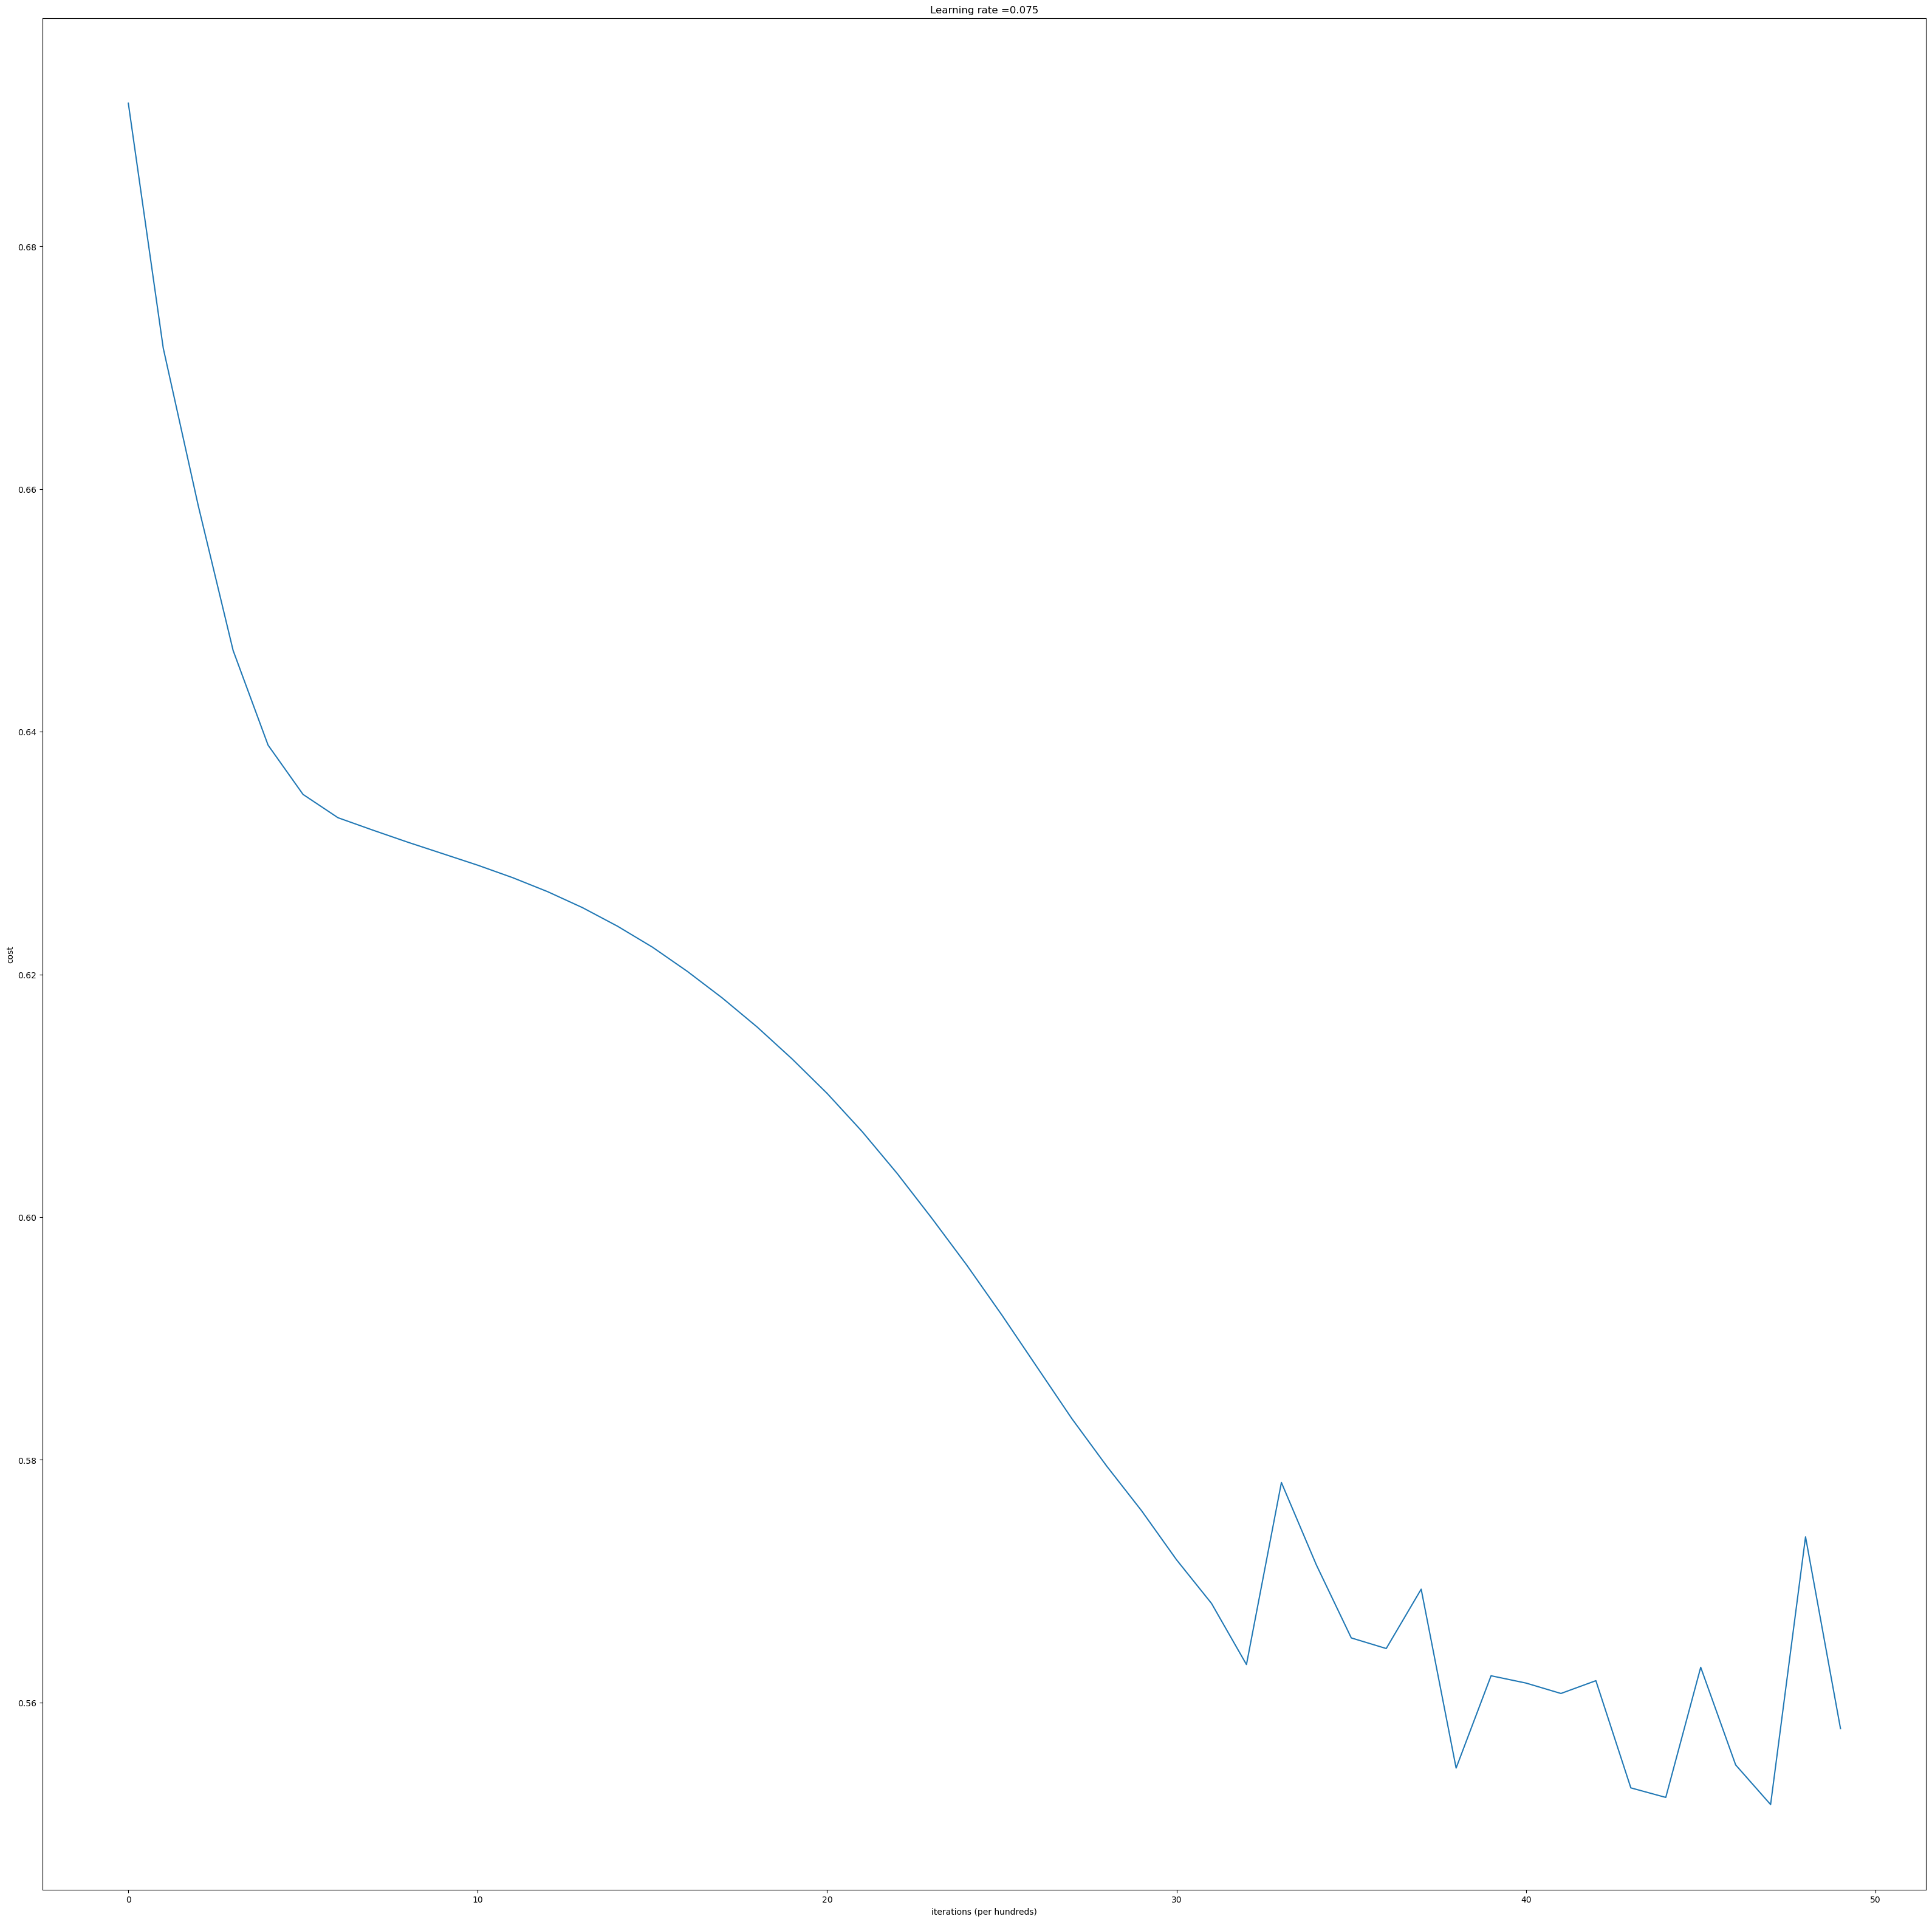

Train
Accuracy: 0.7215496368038743
Test
Accuracy: 0.7500000000000001


In [20]:
# Your work for building a basic model and then applying improvements

n_x = X_train.shape[1]
n_h = 4
n_y = X_train.shape[1]
newy_train = y_train.T
layers_dims = [11, 20, 7, 5, 1]


############################## Running Momentum and L2 Regularization #######################################################
print("Momentum and L2 Regularization: ")

costs = []
num_iterations = 5000
learning_rate = 0.5
beta = 0.9
lambd = 0.5
print_cost = True

parameters = initialize_parameters_deep2(layers_dims)

for i in range(0, num_iterations):
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
    AL, cache = L_model_forward2(X_train.T, parameters)

    # Compute cost.
#     cost = compute_cost(AL, newy_train)
    cost = L2_regularization(AL, newy_train, parameters, cache, lambd)

    # Backward propagation.
#     grads = L_model_backward(AL, newy_train, cache)
    grads = backward_regularization(AL, newy_train, cache, 1, lambd)

    # Update parameters.
#     parameters = update_parameters(parameters, grads, learning_rate)
    parameters = momentum_update(parameters, grads, learning_rate, beta)
    
    # Print the cost every 100 training example
    if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
    if print_cost and i % 100 == 0:
        costs.append(cost)
            
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

print("Train")
pred_train = predict2(X_train.T, newy_train, parameters) 
print("Test")
pred_test = predict2(X_test.T, y_test.T, parameters)

############################## Running Just Momentum  #######################################################
print("Just Momentum: ")

costs = []
num_iterations = 5000
learning_rate = 0.075
beta = 0.9
lambd = 0.5
print_cost = True

parameters = initialize_parameters_deep2(layers_dims)

for i in range(0, num_iterations):
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
    AL, cache = L_model_forward2(X_train.T, parameters)

    # Compute cost.
    cost = compute_cost(AL, newy_train)
#     cost = L2_regularization(AL, newy_train, parameters, cache, lambd)

    # Backward propagation.
    grads = L_model_backward(AL, newy_train, cache)
#     grads = backward_regularization(AL, newy_train, cache, 1, lambd)

    # Update parameters.
#     parameters = update_parameters(parameters, grads, learning_rate)
    parameters = momentum_update(parameters, grads, learning_rate, beta)
    
    # Print the cost every 100 training example
    if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
    if print_cost and i % 100 == 0:
        costs.append(cost)
            
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

print("Train")
pred_train = predict2(X_train.T, newy_train, parameters) 
print("Test")
pred_test = predict2(X_test.T, y_test.T, parameters)


############################## Running Just L2 Regularization  #######################################################
print("Just L2 Regularization: ")

costs = []
num_iterations = 5000
learning_rate = 0.075
beta = 0.9
lambd = 0.5
print_cost = True

parameters = initialize_parameters_deep(layers_dims)

for i in range(0, num_iterations):
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
    AL, cache = L_model_forward(X_train.T, parameters)

    # Compute cost.
#     cost = compute_cost(AL, newy_train)
    cost = L2_regularization(AL, newy_train, parameters, cache, lambd)

    # Backward propagation.
#     grads = L_model_backward(AL, newy_train, cache)
    grads = backward_regularization(AL, newy_train, cache, 1, lambd)

    # Update parameters.
    parameters = update_parameters(parameters, grads, learning_rate)
#     parameters = momentum_update(parameters, grads, learning_rate, beta)
    
    # Print the cost every 100 training example
    if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
    if print_cost and i % 100 == 0:
        costs.append(cost)
            
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

print("Train")
pred_train = predict(X_train.T, newy_train, parameters) 
print("Test")
pred_test = predict(X_test.T, y_test.T, parameters)





Initially we implemented L2 Regularization because our hypothesis was that we had high variance. After implementing L2 regularization, we found that the costs changed, but the test and train accuracies did not change. When we adjusted the values for lambda, we did not see much of a result in the accuracy. This indicated to us that we did not have a high variance problem but we had high bias. So we increased the number of iterations on our training data which helped with accuracy. 

Below is an image of our results using L2 Regularization 

<img src="images/regularization.png">

When we implemented L2 Regularization we noticed that the graph looked ragged, and since L2 Regularization didn't do much for our accuracy we decided to try smoothing it out using Gradient descent with momentum. We implemented gradient descent with momentum and found that both the test and train data accuracy increased. Lastly, we wanted to get the most out of our limited data so we attempted to implemented mini batches but faced a division by zero error and chose not to pursue further because the mini batch sizes were not large and was a waste of vectorization.

In addition to our improvements we also adjusted the hyperparameters. Using momentum, we added beta as a hyperparameter. When tuning our hyperparameters we manually tested them and found that at a certain point when tuning there is an optimal value that will give the best results for accuracy, and past that threshold the cost includes more outliers. We found that the most change tuning beta to be closer to 1. Similarly we tuned the learning_rate and found the best results around 0.5.

When we use L2 Regularization and Gradient Descent with Momentum at the same time we don't get as accurate results as applying them separately. After these experiments we've gained a greater understanding on what will help to improve our model. Knowing that we are dealing with high bias, in the future it would help to add more layers or nodes to our neural network. Also the data we're working on might benefit from changing the activation functions. For our model we chose to stick with the activation functions and the model that from part 1 and optimize our data in different ways. 